/tmp/ipykernel_14936/643890124.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['forecast_date', 'target', 'location', 'quantile', 'scenario_id', 'type'], 1).reset_index(drop=True).rename(columns={'target_end_date': 'date'})
/tmp/ipykernel_14936/643890124.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('date', 1)


<AxesSubplot:>

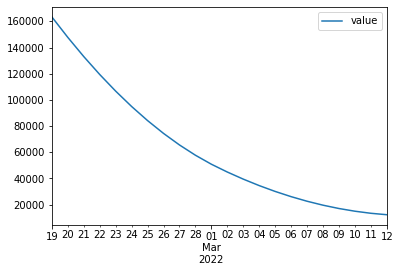

In [2]:
import pandas as pd

df = pd.read_csv('raw_data/covid-forecast-2022-02-14.csv')

# remove death records
df = df[~df.target.str.contains("death")]

# remove quntile records
df = df[df.type == 'point']

forecast_date = df.forecast_date[0]

df = df.drop(['forecast_date', 'target', 'location', 'quantile', 'scenario_id', 'type'], 1).reset_index(drop=True).rename(columns={'target_end_date': 'date'})

df.date = pd.to_datetime(df.date)
# df.plot(x = 'date')
df.index = df.date
df = df.drop('date', 1)

df = df.reindex(pd.date_range(df.index[0],df.index[-1],freq='D'))
df = df.interpolate(method='quadratic')
df.value = df.value.astype(int)
df.plot()


